# Second Year Computational Chemistry Workshop

This workshop will cover:
* Potential energy surfaces
* Energy minimisation
* Geometry optimisation
* Zero-point energy

In this workshop we will make use of Python in a Jupyter notebook. To run a block of code in a cell you can click on the cell and then press Shift-Enter.

For example here we will import some useful modules:
* numpy---useful for things that invlove matricies
* scipy---scientific python modules
* matplotlib---for plotting

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Now we have imported them we can start to use them. For example we can create a numpy array of using np.linspace and use it to make a plot of $\sin x$

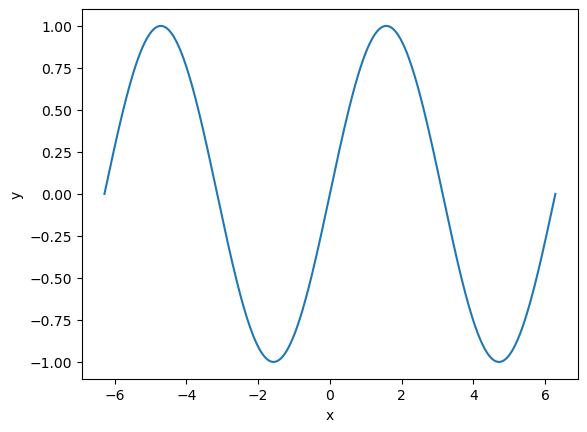

In [4]:
from math import pi
x = np.linspace(-2*pi, 2*pi, 999)
y = np.sin(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[Scipy](https://scipy.org/) has some powerful minimization tools which we can make use of to optimize the geometry of a molecule from its potential energy surface. Take a look at the various [optimization methods](https://docs.scipy.org/doc/scipy/reference/optimize.html). For example we can use the minimize_scalar function to find the minimum of the $\sin$ function.

In [24]:
sp.optimize.minimize_scalar(np.sin)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: -1.57079633282402
     nit: 8
    nfev: 12

But the $\sin$ function, like many potential energy surfaces has multiple ($\infty$) minima and the minimize_scalar function will just find the one it starts in. We can find a different one by providing a bracket parameter which provides two intital points to start from.

In [20]:
sp.optimize.minimize_scalar(np.sin, bracket=(3, 4))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 4.712388980317131
     nit: 8
    nfev: 11

A bad choice of starting points can take longer to converge...

In [8]:
sp.optimize.minimize_scalar(np.sin, bracket=(0, 2*pi))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 17.278759594348845
     nit: 13
    nfev: 17

In [ ]:
a['x']